In [8]:
from annoy import AnnoyIndex
import pandas as pd
import numpy as np
import cv2
import sys  
sys.path.insert(0, '../')
import matplotlib.pyplot as plt
from bot.utils.color_extractor import ColorFeaturesExtractor, Mode
from bot.utils.BOVW_extractor import BOVWFeaturesExtractor
from bot.utils.hog_extractor import HogFeaturesExtractor
from bot.utils.lbp_extractor import LBPFeaturesExtractor
from bot.utils.retriever import Retriever
from bot.utils.utils import get_names_from_indexes
import tensorflow as tf
from skimage.io import imread
import pickle
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# Create indexes

In [3]:
def create_index(features_path, index_dir_path, retrieval_mode, metric):
    # read features
    df_features = pd.read_csv(features_path, sep=',', header=None)
    print('features',len(df_features.loc[0,:]))
    # instantiate retriever
    retriever = Retriever(index_dir_path)
    # create index
    retriever.create_index(df_features, retrieval_mode=retrieval_mode, metric = metric)
#     return df_features

In [3]:
# # neural network efficientnet features
create_index('../data/nn_features.csv', '../indexes/', 'neural_network', 'angular')

In [4]:
# neural network efficientnet features pc
create_index('../data/nn_features_pca.csv', '../indexes/', 'neural_network_pca', 'angular')

In [3]:
# # neural network resnet features
create_index('../data/nn_resnet_features.csv', '../indexes/', 'neural_network_resnet', 'angular')

In [4]:
# neural network resnet features pc
create_index('../data/nn_resnet_features_pca.csv', '../indexes/', 'neural_network_resnet_pca', 'angular')

In [5]:
# # color features
create_index('../data/color_features.csv', '../indexes/', 'color', 'euclidean')

In [6]:
# color features pca
create_index('../data/color_features_pca.csv', '../indexes/', 'color_pca', 'euclidean')

In [7]:
# # color features center subregions
create_index('../data/color_features_center_subregions.csv', '../indexes/', 'color_center_subregions', 'euclidean')

In [8]:
# color features center subregions pca
create_index('../data/color_features_center_subregions_pca.csv', '../indexes/', 'color_center_subregions_pca', 'euclidean')

In [9]:
# # BOVW features
# create_index('../data/BOVW_features.csv', '../indexes/', 'bovw', 'angular')

In [10]:
# # BOVW features pca
# create_index('../data/BOVW_features_pca.csv', '../indexes/', 'bovw_pca', 'angular')

In [11]:
# # HOG features
create_index('../data/hog_features.csv', '../indexes/', 'hog', 'euclidean')

In [12]:
# HOG features pca
create_index('../data/hog_features_pca.csv', '../indexes/', 'hog_pca', 'euclidean')

In [13]:
# # color + HOG features
# create_index('../data/merged_color_hog_features.csv', '../indexes/', 'color_hog', 'angular')

In [14]:
# color + HOG features with pca
create_index('../data/hog_color_features_pca.csv', '../indexes/', 'hog_color_pca', 'euclidean')

In [15]:
# # color + HOG features with pca and standardization
# create_index('../data/merged_color_hog_pca_std.csv', '../indexes/', 'color_hog_pca_std', 'angular')

In [4]:
# lbp center features
create_index('../data/lbp_center_features.csv', '../indexes/', 'lbp', 'euclidean')

26


# Test retrieval

In [5]:
# utils
def show_images(idx, names_df, img_path):
    # plot starting image
    img_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=(2, 2))
    ax.imshow(img_rgb)
    plt.show()
    # extract names
    names = names_df.loc[idx,'name'].values
    # prepare plot
    n_elements = len(names)
    fig, ax = plt.subplots(1,n_elements,figsize=(12,6))
    for i in range(0,n_elements):
        tmp = cv2.imread('../data/train/' + names[i])
        tmp = cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB)
        ax[i].imshow(tmp)
    plt.show()
    return names

# efficientnet
def loadimg(img_path):

    im = tf.keras.preprocessing.image.load_img(
        img_path,
        target_size=(300, 300, 3)
    )
    imarr = tf.keras.preprocessing.image.img_to_array(im)
    imarr = tf.keras.applications.efficientnet.preprocess_input(imarr)
    return np.array([imarr])

# resnet
def preprocess_img(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    return img_data


In [180]:
# instantiate retriever
retriever = Retriever('../indexes/', load_all=True)
# choose image
img_path = '../test_imgs/not_blurred_1.jpg'
# settings
n_neighbours = 10

loading neural_network ...
loading neural_network_pca ...
loading color ...
loading color_pca ...
loading color_center_subregions ...
loading color_center_subregions_pca ...
loading hog ...
loading hog_pca ...
loading hog_color_pca ...
loading neural_network_resnet ...
loading neural_network_resnet_pca ...
loading lbp ...


## Neural network resnet

In [181]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [182]:
# read model
model = ResNet50(weights='imagenet', include_top=False, pooling='max')

In [183]:
# NN
img_features_nn = model.predict(preprocess_img(img_path))[0]

In [184]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_nn, retrieval_mode='neural_network_resnet', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [185]:
distances

[0.6208259463310242,
 0.6305535435676575,
 0.6348721385002136,
 0.6355183720588684,
 0.6402267813682556,
 0.641840398311615,
 0.6456469297409058,
 0.6503551006317139,
 0.6505638360977173,
 0.6559358835220337]

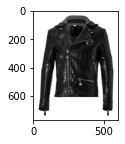

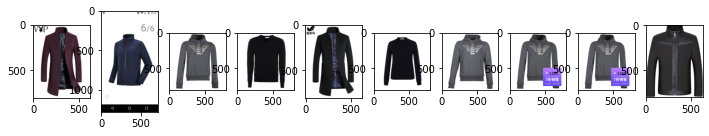

array(['2110.jpg', '1801.jpg', '7.jpg', '793.jpg', '4607.jpg', '4421.jpg',
       '15.jpg', '11.jpg', '8.jpg', '3346.jpg'], dtype=object)

In [186]:
# show retrieval results
show_images(indexes, df_names, img_path)


## Neural network resnet PCA

In [187]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [188]:
# read model
model = ResNet50(weights='imagenet', include_top=False, pooling='max')

In [189]:
# NN
img_features_nn = model.predict(preprocess_img(img_path))[0]
# read pca model
with open('../data/pca_nn_resnet.pckl', 'rb') as handle:
                    pca_nn = pickle.load(handle)
# apply pca
img_features_nn_pca = pca_nn.transform([img_features_nn])[0]

In [190]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_nn_pca, retrieval_mode='neural_network_resnet_pca', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [191]:
distances

[0.6120406985282898,
 0.6294093132019043,
 0.6338314414024353,
 0.6416566371917725,
 0.6430303454399109,
 0.6475739479064941,
 0.6745352745056152,
 0.6838414669036865,
 0.6897072196006775,
 0.6930708885192871]

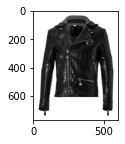

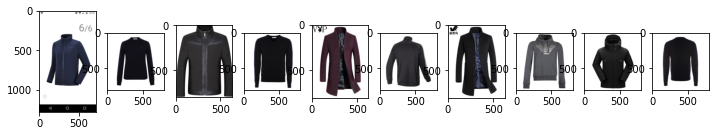

array(['1801.jpg', '4421.jpg', '3346.jpg', '793.jpg', '2110.jpg',
       '3514.jpg', '4607.jpg', '7.jpg', '4666.jpg', '794.jpg'],
      dtype=object)

In [192]:
# show retrieval results
show_images(indexes, df_names, img_path)


## Neural network efficientnet

In [193]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [194]:
# read model
model = tf.keras.models.load_model('../data/model.h5')

In [195]:
# NN
img_features_nn = model.predict(loadimg(img_path))[1][0]

In [196]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_nn, retrieval_mode='neural_network', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [197]:
distances

[0.803567111492157,
 0.8467894196510315,
 0.8522433638572693,
 0.8728735446929932,
 0.8772332668304443,
 0.891546905040741,
 0.8991755247116089,
 0.9004438519477844,
 0.9049971103668213,
 0.9057246446609497]

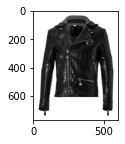

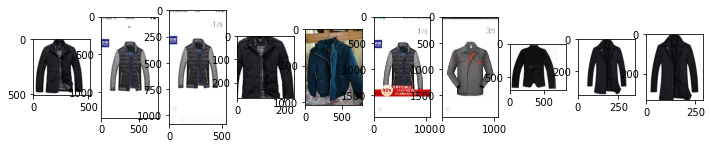

array(['1563.jpg', '2913.jpg', '2912.jpg', '3558.jpg', '1398.jpg',
       '2902.jpg', '1997.jpg', '5145.jpg', '2444.jpg', '2443.jpg'],
      dtype=object)

In [198]:
# show retrieval results
show_images(indexes, df_names, img_path)


## Neural network efficientnet PCA

In [199]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [200]:
# read model
model = tf.keras.models.load_model('../data/model.h5')

In [201]:
# NN
img_features_nn = model.predict(loadimg(img_path))[1][0]
# read pca model
with open('../data/pca_nn.pckl', 'rb') as handle:
                    pca_nn = pickle.load(handle)
# apply pca
img_features_nn_pca = pca_nn.transform([img_features_nn])[0]

In [202]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_nn_pca, retrieval_mode='neural_network_pca', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [203]:
distances

[0.6568660140037537,
 0.6643565893173218,
 0.6816517114639282,
 0.6959401965141296,
 0.7146183848381042,
 0.7234058380126953,
 0.7527686953544617,
 0.7544329166412354,
 0.757988452911377,
 0.7588307857513428]

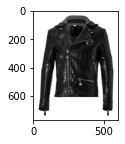

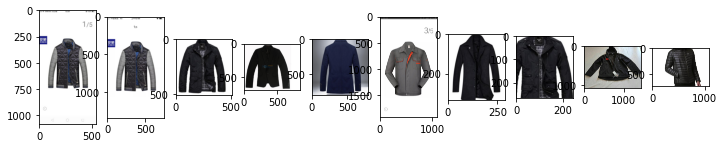

array(['2912.jpg', '2913.jpg', '1563.jpg', '5145.jpg', '2620.jpg',
       '1997.jpg', '2443.jpg', '3558.jpg', '4673.jpg', '633.jpg'],
      dtype=object)

In [204]:
# show retrieval results
show_images(indexes, df_names, img_path)


## Color

In [205]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [206]:
# color extractor
features_extractor = ColorFeaturesExtractor((24, 26, 3), 0.6)
img_features_color = features_extractor.extract(cv2.imread(img_path), Mode.CENTER_ONLY)

In [207]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_color, retrieval_mode='color', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [208]:
distances

[0.10295025259256363,
 0.14169950783252716,
 0.14435598254203796,
 0.14471623301506042,
 0.14736433327198029,
 0.1475057154893875,
 0.14862939715385437,
 0.14876212179660797,
 0.15009528398513794,
 0.15298105776309967]

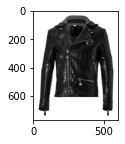

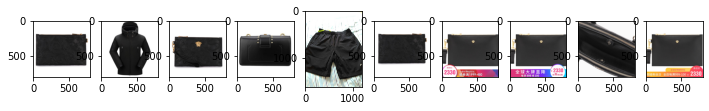

array(['36250.jpg', '4666.jpg', '36249.jpg', '35694.jpg', '13330.jpg',
       '36244.jpg', '33137.jpg', '33134.jpg', '32101.jpg', '33135.jpg'],
      dtype=object)

In [209]:
# show retrieval results
show_images(indexes, df_names, img_path)

## Color PCA

In [210]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [211]:
# color extractor
features_extractor = ColorFeaturesExtractor((24, 26, 3), 0.6)
img_features_color = features_extractor.extract(cv2.imread(img_path), Mode.CENTER_ONLY)
# read pca model
with open('../data/pca_color.pckl', 'rb') as handle:
                    pca_color = pickle.load(handle)
# apply pca
img_features_color_pca = pca_color.transform([img_features_color])[0]

In [212]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_color_pca, retrieval_mode='color_pca', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [213]:
distances

[0.08711260557174683,
 0.11717762798070908,
 0.11743900179862976,
 0.12196169793605804,
 0.1243685930967331,
 0.13206200301647186,
 0.13299201428890228,
 0.1343606859445572,
 0.13506439328193665,
 0.1404731124639511]

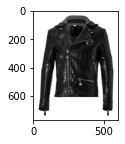

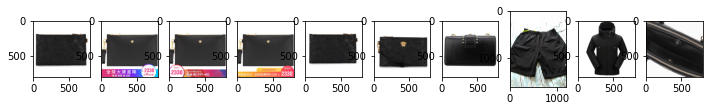

array(['36250.jpg', '33134.jpg', '33137.jpg', '33135.jpg', '36244.jpg',
       '36249.jpg', '35694.jpg', '13330.jpg', '4666.jpg', '32101.jpg'],
      dtype=object)

In [214]:
# show retrieval results
show_images(indexes, df_names, img_path)

## Color center subregions

In [215]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [216]:
# color extractor
features_extractor = ColorFeaturesExtractor((16, 18, 2), 0.6)
img_features_color = features_extractor.extract(cv2.imread(img_path), Mode.CENTER_SUBREGIONS)

In [217]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_color, retrieval_mode='color_center_subregions', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [218]:
distances

[0.4047929048538208,
 0.45219486951828003,
 0.4642828106880188,
 0.4771203398704529,
 0.4921855926513672,
 0.5019386410713196,
 0.5019386410713196,
 0.5238696336746216,
 0.5244537591934204,
 0.5244537591934204]

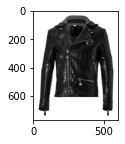

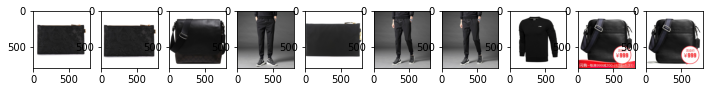

array(['36244.jpg', '36250.jpg', '29220.jpg', '12600.jpg', '33141.jpg',
       '12987.jpg', '13745.jpg', '961.jpg', '28420.jpg', '28881.jpg'],
      dtype=object)

In [219]:
# show retrieval results
show_images(indexes, df_names, img_path)

## Color center subregions PCA

In [220]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [221]:
# color extractor
features_extractor = ColorFeaturesExtractor((16, 18, 2), 0.6)
img_features_color = features_extractor.extract(cv2.imread(img_path), Mode.CENTER_SUBREGIONS)
# read pca model
with open('../data/pca_color_center_subregions.pckl', 'rb') as handle:
                    pca_color_center_subregions = pickle.load(handle)
# apply pca
img_features_color_pca = pca_color_center_subregions.transform([img_features_color])[0]

In [222]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_color_pca, retrieval_mode='color_center_subregions_pca', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [223]:
distances

[0.28349733352661133,
 0.2953125834465027,
 0.30247724056243896,
 0.31452998518943787,
 0.31452998518943787,
 0.3302529454231262,
 0.3347082734107971,
 0.337028831243515,
 0.33712857961654663,
 0.3489640951156616]

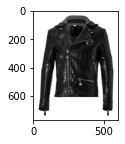

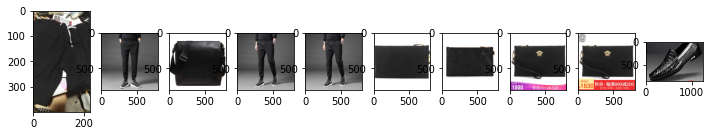

array(['7289.jpg', '12600.jpg', '29220.jpg', '12987.jpg', '13745.jpg',
       '33141.jpg', '36244.jpg', '33149.jpg', '33150.jpg', '17706.jpg'],
      dtype=object)

In [224]:
# show retrieval results
show_images(indexes, df_names, img_path)

## HOG

In [225]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [226]:
# HOG extractor
features_extractor = HogFeaturesExtractor()
img_features_hog = features_extractor.extract(imread(img_path))

In [227]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_hog, retrieval_mode='hog', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [228]:
distances

[7.466421127319336,
 7.4727783203125,
 7.484484672546387,
 7.497528076171875,
 7.605223655700684,
 7.662158012390137,
 7.669654846191406,
 7.783581256866455,
 7.843643665313721,
 7.888047695159912]

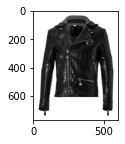

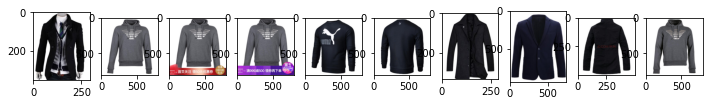

array(['3867.jpg', '15.jpg', '13.jpg', '14.jpg', '1807.jpg', '1805.jpg',
       '2443.jpg', '6109.jpg', '3559.jpg', '9.jpg'], dtype=object)

In [229]:
# show retrieval results
show_images(indexes, df_names, img_path)

## HOG PCA

In [230]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/rpo.jpg'

In [231]:
# HOG extractor
features_extractor = HogFeaturesExtractor()
img_features_hog = features_extractor.extract(imread(img_path))
# read pca model
with open('../data/pca_hog.pckl', 'rb') as handle:
                    pca_hog = pickle.load(handle)
# apply pca
img_features_hog_pca = pca_hog.transform([img_features_hog])[0]

In [232]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_hog_pca, retrieval_mode='hog_pca', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [233]:
distances

[4.192753791809082,
 4.348588466644287,
 4.415851593017578,
 4.506133079528809,
 4.534664630889893,
 4.54378604888916,
 4.668065547943115,
 4.704047203063965,
 4.7675395011901855,
 4.785917282104492]

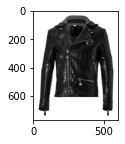

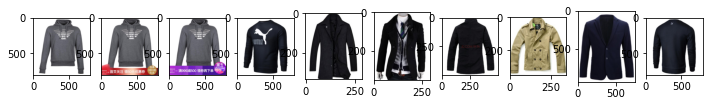

array(['15.jpg', '13.jpg', '14.jpg', '1807.jpg', '2443.jpg', '3867.jpg',
       '3559.jpg', '3072.jpg', '6109.jpg', '1805.jpg'], dtype=object)

In [234]:
# show retrieval results
show_images(indexes, df_names, img_path)

## Color + HOG pca

In [235]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/rpo.jpg'

In [236]:
# extractors
hog_features_extractor = HogFeaturesExtractor()
color_features_extractor = ColorFeaturesExtractor((24, 26, 3), 0.6)
# extract features
img_features_hog = hog_features_extractor.extract(imread(img_path))
img_features_color = color_features_extractor.extract(cv2.imread(img_path), Mode.CENTER_ONLY)
# read pca models
with open('../data/pca_hc_hog.pckl', 'rb') as handle:
                    pca_hc_hog = pickle.load(handle)
with open('../data/pca_hc_color.pckl', 'rb') as handle:
                    pca_hc_color = pickle.load(handle)
# apply pca
img_features_hog_pca = pca_hc_hog.transform([img_features_hog])[0]
img_features_color_pca = pca_hc_color.transform([img_features_color])[0]
# merge features
img_features_merged_pca = np.hstack([img_features_hog_pca, img_features_color_pca])

In [237]:
img_features_merged_pca.shape

(300,)

In [238]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_merged_pca, retrieval_mode='hog_color_pca', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [239]:
distances

[4.478326320648193,
 4.617156505584717,
 4.630599498748779,
 4.679064750671387,
 4.724579334259033,
 4.797312259674072,
 4.85413932800293,
 4.900972366333008,
 4.9412078857421875,
 4.968265533447266]

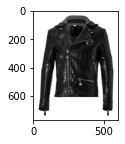

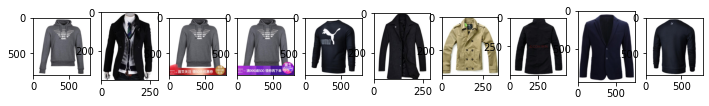

array(['15.jpg', '3867.jpg', '13.jpg', '14.jpg', '1807.jpg', '2443.jpg',
       '3072.jpg', '3559.jpg', '6109.jpg', '1805.jpg'], dtype=object)

In [240]:
# show retrieval results
show_images(indexes, df_names, img_path)

## LBP

In [241]:
# read images names
df_names = pd.read_csv('../data/retrieval_base.csv')
# choose img
# img_path = '../test_imgs/tshirt.jpg'

In [242]:
# LBP extractor
features_extractor = LBPFeaturesExtractor(24,7,0.6)
img_features_lbp = features_extractor.extract(cv2.imread(img_path), center_only=True)

In [243]:
# retrieve images
(indexes, distances) = retriever.retrieve(img_features_lbp, retrieval_mode='lbp', n_neighbours=n_neighbours, include_distances=True)

retrieve from preloaded indexes


In [244]:
distances

[0.0026431698352098465,
 0.003468340029940009,
 0.0038862531073391438,
 0.003948276862502098,
 0.004307778552174568,
 0.00433400459587574,
 0.004349946044385433,
 0.004721282981336117,
 0.004944801330566406,
 0.005040280055254698]

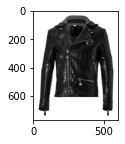

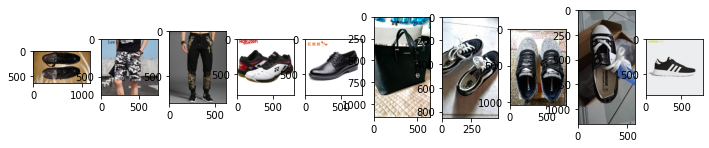

array(['17466.jpg', '10639.jpg', '12081.jpg', '26010.jpg', '17344.jpg',
       '36713.jpg', '21229.jpg', '17783.jpg', '18285.jpg', '27808.jpg'],
      dtype=object)

In [245]:
# show retrieval results
show_images(indexes, df_names, img_path)

# Test delete

In [246]:
# test delete index
retriever.delete_index('replace_value')

## Color + HOG (OLD)

In [247]:
# # read images names
# df_names = pd.read_csv('../data/retrieval_base.csv')
# # choose img
# img_path = '../test_imgs/tshirt.jpg'

In [248]:
# # extractors
# hog_features_extractor = HogFeaturesExtractor()
# color_features_extractor = ColorFeaturesExtractor((24, 26, 3), 0.6)
# # extract features
# img_features_hog = hog_features_extractor.extract(imread(img_path))
# img_features_color = color_features_extractor.extract(cv2.imread(img_path), center_only=True)
# # merge features
# img_features_merged = np.concatenate((img_features_hog, img_features_color))

In [249]:
# # retrieve images
# (indexes, distances) = retriever.retrieve(img_features_merged, retrieval_mode='color_hog', n_neighbours=5, include_distances=True)

In [250]:
# distances

In [251]:
# # show retrieval results
# show_images(indexes, df_names)

## Color + HOG pca and standardization (OLD)

In [252]:
# # read images names
# df_names = pd.read_csv('../data/retrieval_base.csv')
# # choose img
# img_path = '../test_imgs/rpo.jpg'
# img_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
# plt.imshow(img_rgb)

In [253]:
# # extractors
# hog_features_extractor = HogFeaturesExtractor()
# color_features_extractor = ColorFeaturesExtractor((24, 26, 3), 0.6)
# # extract features
# img_features_hog = hog_features_extractor.extract(imread(img_path))
# img_features_color = color_features_extractor.extract(cv2.imread(img_path), center_only=True)
# # merge features
# img_features_merged = np.concatenate((img_features_hog, img_features_color))
# # read and apply scaler
# with open('../data/scaler_std.pckl', 'rb') as handle:
#                     scaler = pickle.load(handle)
# img_features_merged = scaler.transform([img_features_merged])
# # read and apply pca model
# with open('../data/pca_std.pckl', 'rb') as handle:
#                     pca = pickle.load(handle)
# # apply pca
# img_features_merged_pca = pca.transform(img_features_merged)[0]

In [254]:
# img_features_merged_pca.shape

In [255]:
# # retrieve images
# (indexes, distances) = retriever.retrieve(img_features_merged_pca, retrieval_mode='color_hog_pca_std', n_neighbours=5, include_distances=True)

In [256]:
distances

[0.0026431698352098465,
 0.003468340029940009,
 0.0038862531073391438,
 0.003948276862502098,
 0.004307778552174568,
 0.00433400459587574,
 0.004349946044385433,
 0.004721282981336117,
 0.004944801330566406,
 0.005040280055254698]

In [257]:
# # show retrieval results
# show_images(indexes, df_names)

## BOVW (OLD)

In [258]:
# # read images names
# df_names = pd.read_csv('../data/retrieval_base.csv')
# # choose img
# img_path = '../test_imgs/tshirt.jpg'
# img_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
# plt.imshow(img_rgb)

In [259]:
# # BOVW extractor
# features_extractor = BOVWFeaturesExtractor('../data/')
# img_features_bovw = features_extractor.extract(cv2.imread(img_path))

In [260]:
# # retrieve images
# (indexes, distances) = retriever.retrieve(img_features_bovw, retrieval_mode='bovw', n_neighbours=5, include_distances=True)

In [261]:
# distances

In [262]:
# # show retrieval results
# show_images(indexes, df_names)